# PCA for Dimensionality Reduction

## Objective:
- Understand the concept of Principal Component Analysis (PCA).
- Apply PCA on the Wine Dataset to reduce its dimensionality.
- Visualize the reduced dimensions and interpret the variance retained.
- Explore how PCA simplifies datasets while retaining critical information.

---


## Metadata:
- **Dataset:** Wine Dataset
- **Source:** Available in `sklearn` or from Kaggle
- **Number of Features:** 13 (Alcohol, Malic Acid, etc.)
- **Number of Classes:** 3
- **Purpose:** To classify wine types based on chemical features.

## Data Source:
- The Wine Dataset can be accessed from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine).

## Acknowledgments:
- This dataset is credited to M. Forina et al., who analyzed chemical properties to classify wine types.


# **Import Libraries and Load Dataset**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the Wine Dataset
wine_data = load_wine()
data = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
data['target'] = wine_data.target

# Display the first few rows
data.head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

### Dataset Overview:
The dataset contains 13 numerical features representing the chemical composition of wines and a target variable indicating wine type (3 classes). Features include:
- **Alcohol**
- **Malic Acid**
- **Ash**
- **Alcalinity of Ash**
- **Magnesium**
- **Total Phenols**
- **Flavanoids**
- **Nonflavanoid Phenols**
- **Proanthocyanins**
- **Color Intensity**
- **Hue**
- **OD280/OD315 of Diluted Wines**
- **Proline**

The goal is to reduce the dataset dimensions using PCA while retaining as much variance as possible.


In [11]:
data.shape

(178, 14)

# **Exploratory Data Analysis (EDA)**

In [3]:
# Summary statistics
data.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [7]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


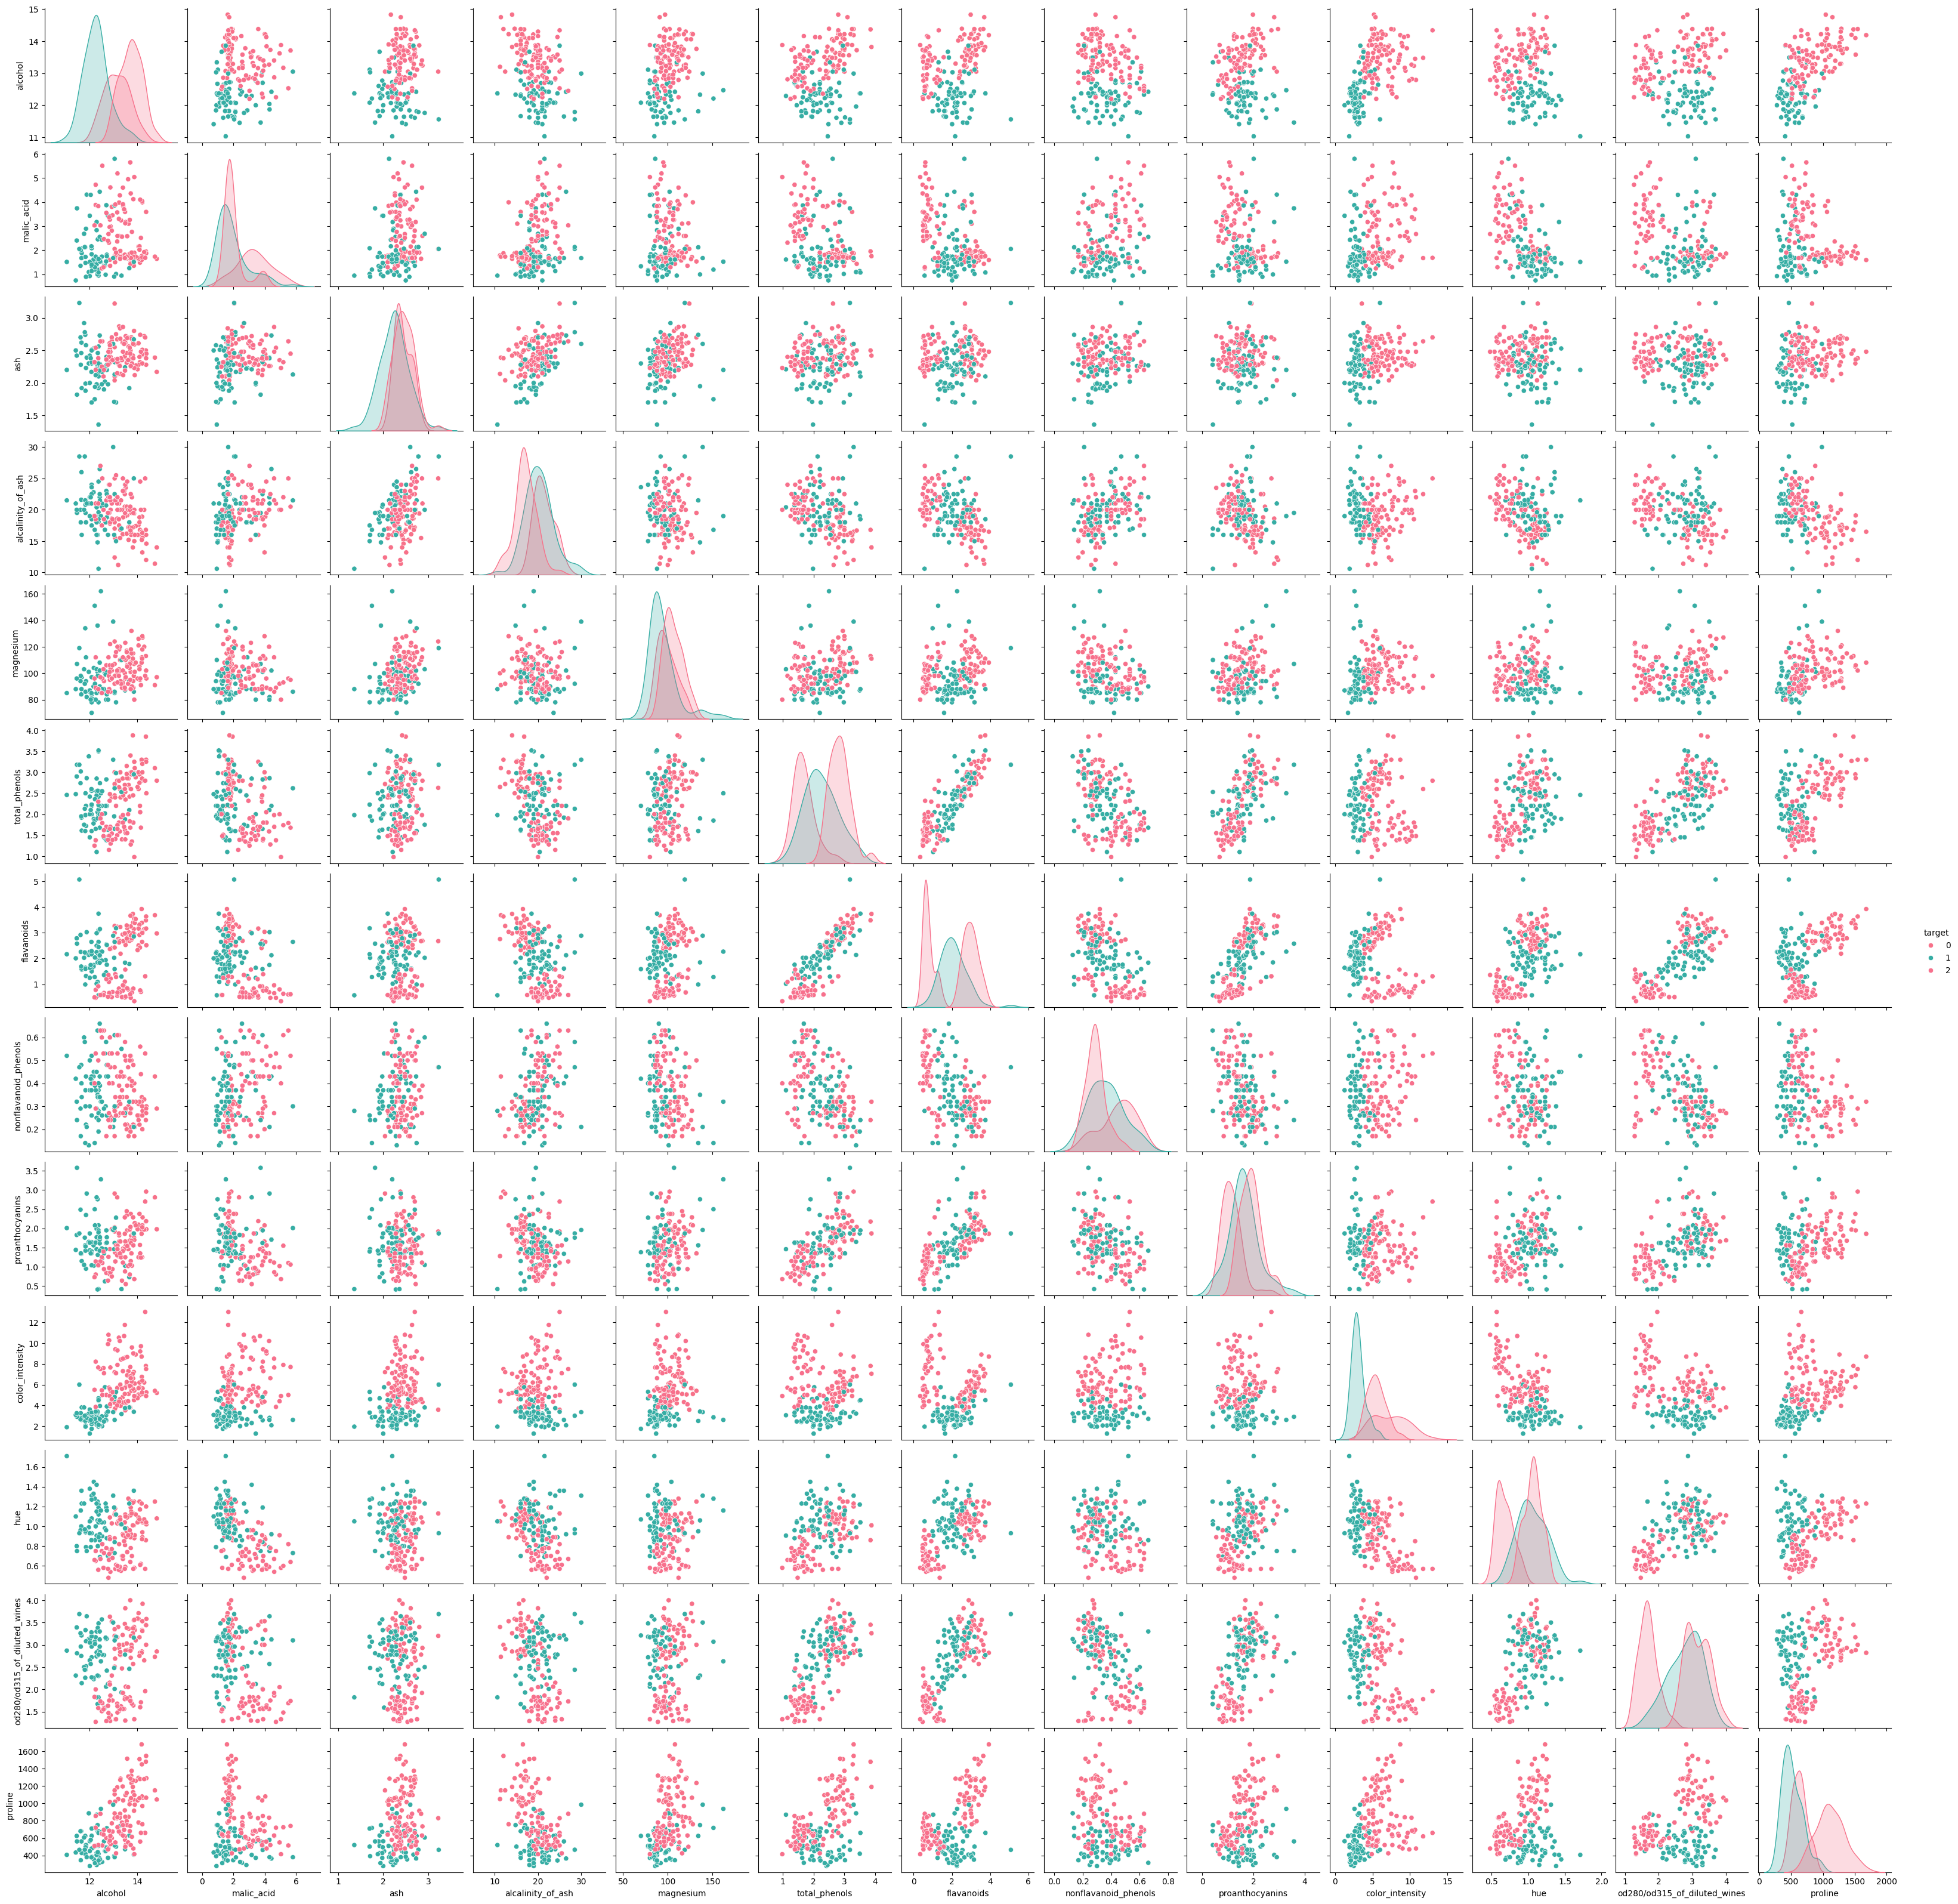

In [8]:
# Pairplot for feature interactions
sns.pairplot(data, hue='target', palette='husl')
plt.show()

### Pair Plot Analysis
- The pair plot reveals some degree of separation between classes when observing combinations of features.
- Certain features exhibit overlapping values across classes, indicating the need for dimensionality reduction to better capture patterns.
- PCA can help condense this information into fewer components for improved interpretability.


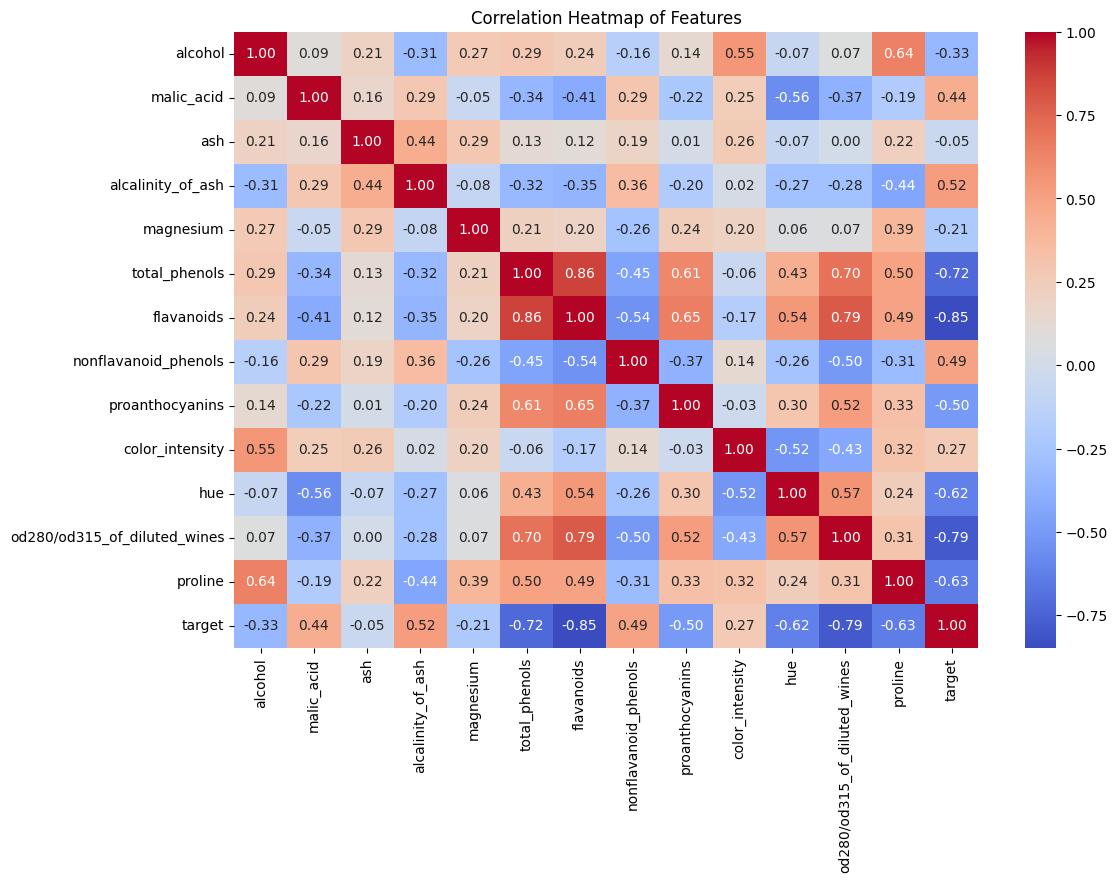

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

### Correlation Analysis
- The correlation heatmap shows strong positive correlations between features like `flavanoids` and `total phenols` and **OD280/OD315 of Diluted Wines** and **total_phenols**
- High correlations indicate redundancy, as these features provide overlapping information.
- PCA addresses this by creating uncorrelated principal components.


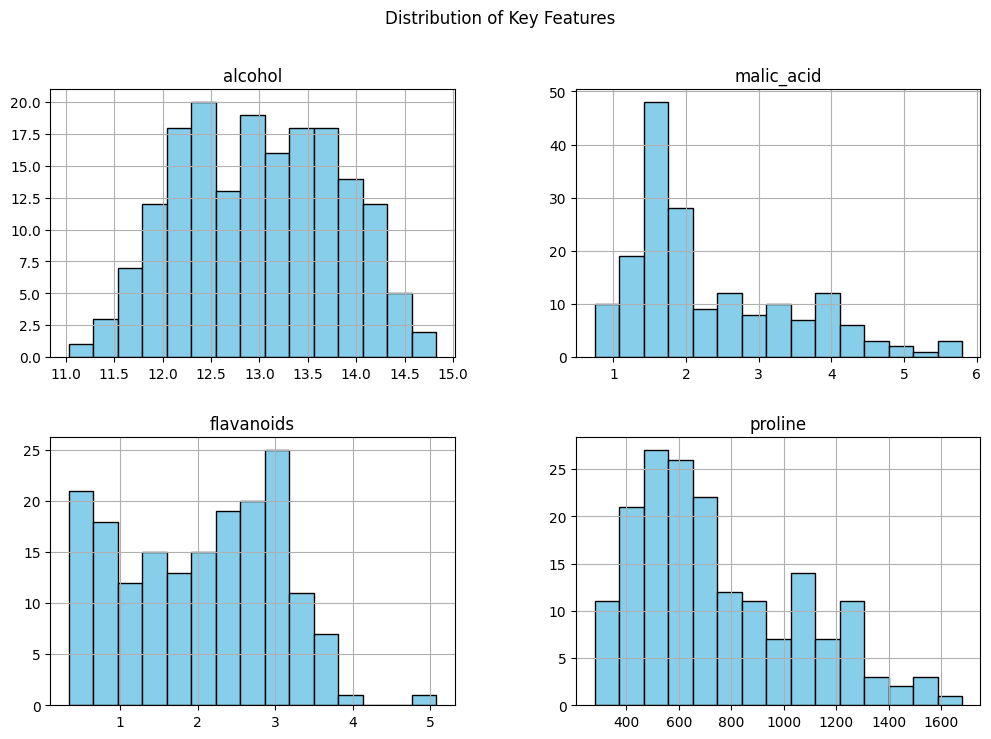

In [10]:
# Distribution of a few features
features = ['alcohol', 'malic_acid', 'flavanoids', 'proline']
data[features].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Key Features')
plt.show()

### Distribution of Features
- The feature distributions vary significantly, with some features (e.g., `proline`) spanning a wide range, while others (e.g., `magnesium`) are more compact.
- Standardization is crucial for PCA to ensure all features contribute equally to the components.
- Class overlap in distributions highlights the challenge of distinguishing between wine types using raw features alone.


# **Preprocessing: Standardization**

In [12]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('target', axis=1))
y = data['target']

# Split the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Why Standardize Features?
PCA is sensitive to feature scales because it identifies directions of maximum variance. Standardization ensures all features contribute equally to the analysis.


# **Principal Component Analysis (PCA)**

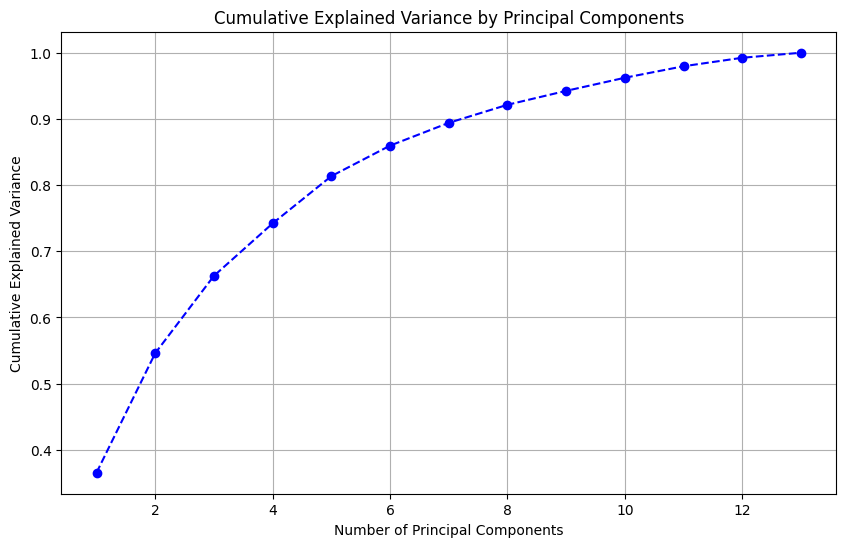

In [13]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


#### PCA Observations:
- The first few principal components capture the majority of variance.
- We can reduce dimensions from 13 to ~2 or 3 while retaining majority of the variance.


# **Reduce Dimensions and Visualize**

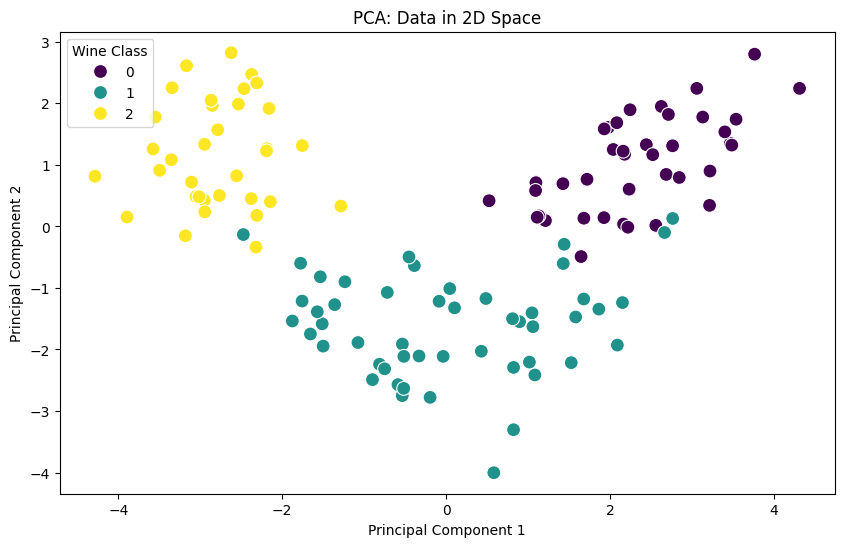

In [26]:
# Retain top 2 components
pca_2 = PCA(n_components=2)
X_train_pca = pca_2.fit_transform(X_train)

# Visualize the reduced dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', s=100)
plt.title('PCA: Data in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class')
plt.show()


#### PCA in 2D Space:
- The 2D scatterplot shows some separation among the wine classes.
- Dimensionality reduction simplifies visualization and aids understanding of complex datasets.


# **Reconstruct Data and Evaluate Loss**

In [27]:
# Reconstruct data from 2 components
X_reconstructed = pca_2.inverse_transform(X_train_pca)

# Calculate reconstruction error
reconstruction_error = np.mean((X_train - X_reconstructed) ** 2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")


Reconstruction Error: 0.4667


### Reconstruction Error:
- Reconstruction error quantifies the information loss due to PCA. A low value indicates minimal loss.


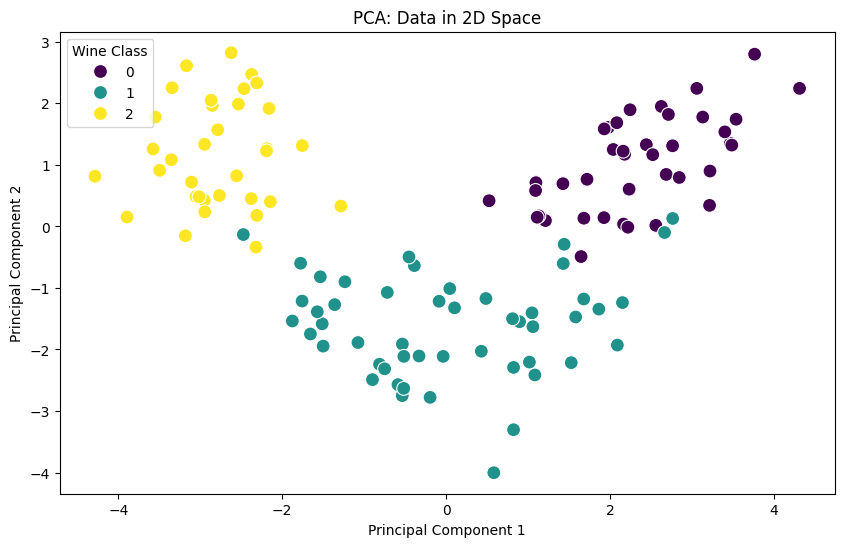

In [28]:
# Retain top 2 components
pca_2 = PCA(n_components=9)
X_train_pca = pca_2.fit_transform(X_train)

# Visualize the reduced dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', s=100)
plt.title('PCA: Data in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class')
plt.show()


In [29]:
# Reconstruct data from 2 components
X_reconstructed = pca_2.inverse_transform(X_train_pca)

# Calculate reconstruction error
reconstruction_error = np.mean((X_train - X_reconstructed) ** 2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")


Reconstruction Error: 0.0592


# **Explanation:**
**PCA Objective**: Reduce dimensionality while retaining as much variance as possible. While reducing to 2 components causes significant information loss, those components still capture the most distinguishing variance. Thus, the 2D visualization effectively segregates the target classes.

**Higher Components**: Retaining all 9 components ensures minimal information loss, but beyond the first two components, additional dimensions might contribute only marginally to class separation.



### Interpretation:
1. **Variance Retained**:
   - With 2 components, the variance retained might be significant for visualization but less so for predictive modeling.
   - With 9 components, almost all the variance is retained (minimal information loss).

2. **Visualization**:
   - The top 2 components capture the most critical variance and still segregate target classes effectively in the reduced 2D space.
   - Higher components (3rd through 9th) mainly address finer details but add minimal separation for visualization purposes.

3. **Conclusion**:
   - Even with reduced dimensionality to 2 PCs, the dataset's inherent structure (target separation) remains preserved for visualization.
   - For downstream tasks (like classification), retaining all 9 PCs ensures optimal performance without significant loss of information.



### What Are Principal Components (PCs)?
- Principal components are **new axes** in the feature space that capture the maximum variance in the data.
- They are derived by applying a mathematical transformation (PCA) to the original features.

### How Are PCs Computed?
1. **Standardization**: All features are standardized (mean = 0, variance = 1) so that they contribute equally to PCA, regardless of their original scale.
2. **Covariance Matrix**: PCA calculates the covariance matrix of the standardized features.
3. **Eigenvalues and Eigenvectors**:
   - Eigenvalues represent the amount of variance captured by each principal component.
   - Eigenvectors define the directions (weights or loadings for each feature) that form the principal components.
4. **Linear Combination**: Each principal component (e.g., PC1, PC2) is a linear combination of the original features:
   \[
   PC1 = w_1x_1 + w_2x_2 + w_3x_3 + \ldots + w_nx_n
   \]
   where \( w_i \) are the eigenvector coefficients (loadings) for feature \( x_i \).

---

### Are PC1 and PC2 Specific Features?
- **No**: PC1 and PC2 are combinations of all features.
- For example:
  - **PC1** might be heavily influenced by a few features (those with the highest loadings), but it is not identical to any one feature.
  - **PC2** is orthogonal to PC1 and captures the next largest variance in the data.

---


### Interpretation:
- **PC1 and PC2 are new, derived features** created to explain the maximum variance in the data.
- They represent directions in the feature space, not any specific feature, but a combination of all.